## Delivery Fleet Data Cluster

This notebook uses K-means clustering to seperate groups of drivers based on each driver's mean distance driven per day, and the percentage of time the driver more than five mph over the speed limit.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv'

df = pd.read_csv(data, sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


In [3]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


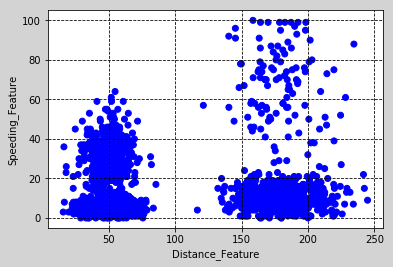

In [4]:
def display(df, labels):
    fig = plt.figure()
    fig.patch.set_facecolor('lightgray')
    
    colors_dict = {
        0 : 'blue',
        1 : 'green',
        2 : 'red',
        3 : 'cyan',
        4 : 'magenta',
        5 : 'yellow',
        6 : 'black',
        7 : 'brown'
    }
    
    colors = [colors_dict[label] for label in labels]
    names  = ["Group {}".format(i) for i in labels]
    
    x = "Distance_Feature"
    y = "Speeding_Feature"
    
    plt.scatter(df[x], df[y], color=colors, label=names)
    plt.grid(color='black', linestyle='--')
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()
    
labels = np.zeros(df.shape[0])
display(df, labels)

In [5]:
feature1 = df["Distance_Feature"].values
feature2 = df["Speeding_Feature"].values

feature_matrix = np.matrix([(f1, f2) for f1, f2 in zip(feature1, feature2)])
feature_matrix.shape

(4000, 2)

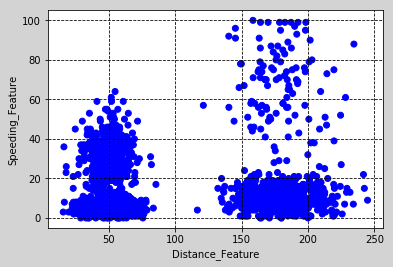

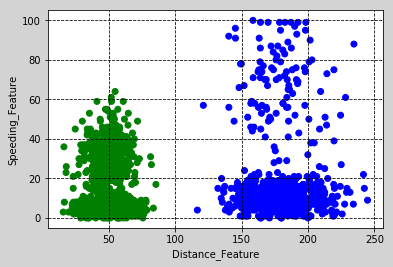

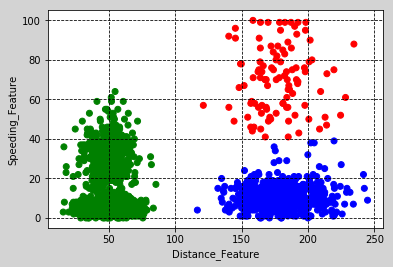

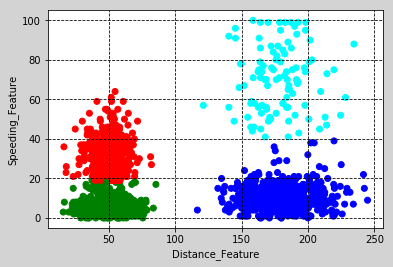

In [7]:
for groups in range(1,5):
    kmeans = KMeans(n_clusters=groups).fit(feature_matrix)
    labels = kmeans.labels_
    display(df, labels)